<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2021/Lab08_Classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
else:
  device = torch.device('cpu')

print(device)

cuda:0


In [3]:
path0 = '/content/drive/MyDrive/data/mnist' # replace with your path

# 모델 학습에 사용할 데이터를 정의

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(path0, train=True, transform=transform, target_transform=None, download=True)
mnist_valid = torchvision.datasets.MNIST(path0, train=False, transform=transform, target_transform=None, download=True)
def get_mnist_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

# defining data_iter, linreg. model, loss, sgd
batch_size = 100
num_workers = 0
train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=num_workers)
valid_iter = DataLoader(mnist_valid, batch_size, shuffle=False, num_workers=num_workers)

In [5]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/data/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
mnist_valid

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/data/mnist
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

torch.Size([100])
torch.Size([100, 1, 28, 28])


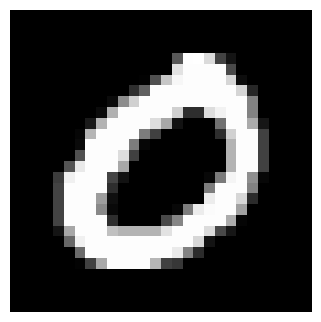

['0']


In [7]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0].numpy()
plt.figure(dpi=100)

plt.imshow(I[0],cmap='gray')
plt.axis('off')
plt.show()
print(get_mnist_labels([labels[0]]))

# LeNet 정의 
- LeNet을 변경해보거나, 다른 architecture를 사용해보기

In [8]:
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=16*5*5, out_features=120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): Sigmoid()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Sigmoid()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): Sigmoid()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): Sigmoid()
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [9]:
X = torch.randn(size=(1,1,28,28), dtype = torch.float32)
X = X.to(device)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


- Learning rate, num_epochs, loss function, algorithm을 정의하기

In [10]:
# setting hyper-parameters
learning_rate = 0.8
num_epochs = 30

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

# 모델을 학습시키기

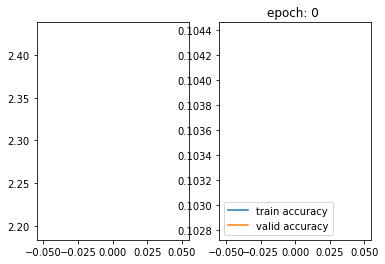

train loss:  2.3109539794921874
train accuracy:  0.10438333451747894
valid accuracy:  0.10279999673366547


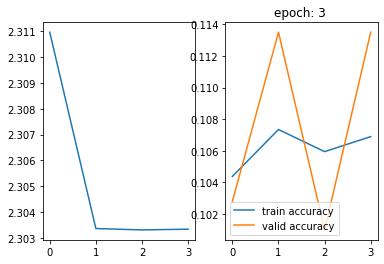

train loss:  2.303343505859375
train accuracy:  0.10689999908208847
valid accuracy:  0.11349999904632568


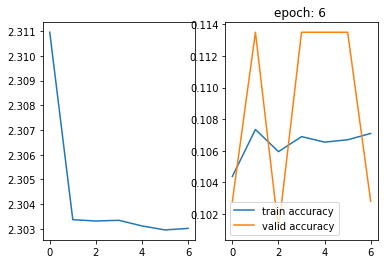

train loss:  2.303016560872396
train accuracy:  0.1071000024676323
valid accuracy:  0.10279999673366547


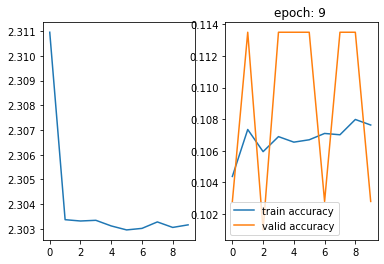

train loss:  2.303159383138021
train accuracy:  0.1076333299279213
valid accuracy:  0.10279999673366547


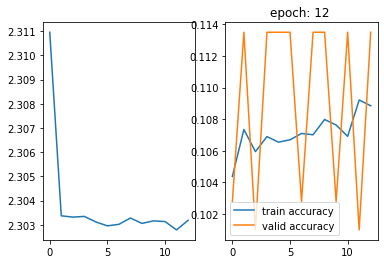

train loss:  2.3031831868489583
train accuracy:  0.10885000228881836
valid accuracy:  0.11349999904632568


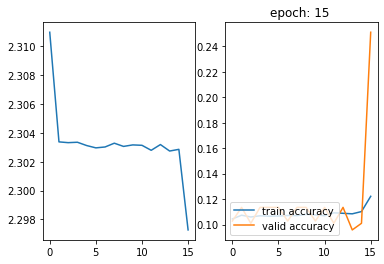

train loss:  2.297278035481771
train accuracy:  0.12218333035707474
valid accuracy:  0.25099998712539673


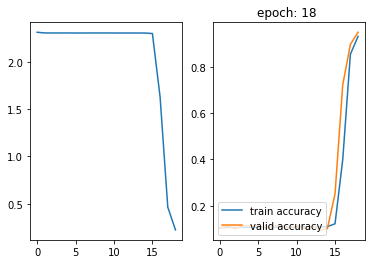

train loss:  0.22379590352376302
train accuracy:  0.9310333132743835
valid accuracy:  0.9488999843597412


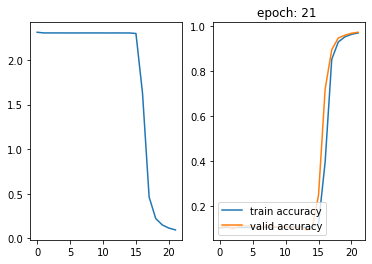

train loss:  0.09563451131184895
train accuracy:  0.9710500240325928
valid accuracy:  0.9743000268936157


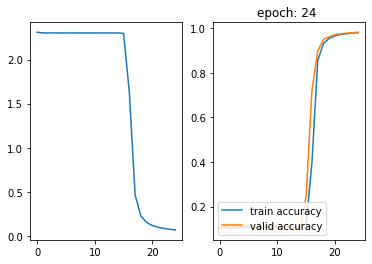

train loss:  0.06597939173380533
train accuracy:  0.979200005531311
valid accuracy:  0.9811000227928162


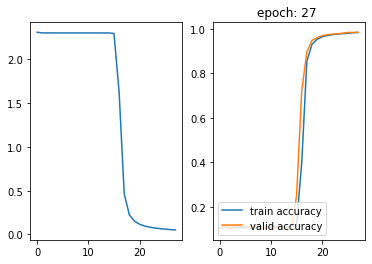

train loss:  0.05143530209859212
train accuracy:  0.9845666885375977
valid accuracy:  0.9855999946594238


In [11]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device) # GPU 
    y_hat=net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/60000.)

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    correct += (y_hat.argmax(dim=1)==y).sum()

  accs_valid = np.append(accs_valid,correct.cpu()/10000.)


  if epoch%3 == 0:
    plt.subplot(121)
    plt.plot(loss_train,label='train loss')
    plt.subplot(122)
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.show()

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])

# Validation Set에 대한 결과를 관찰하기

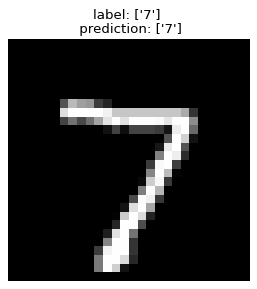

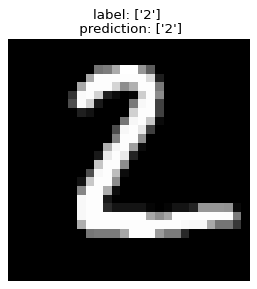

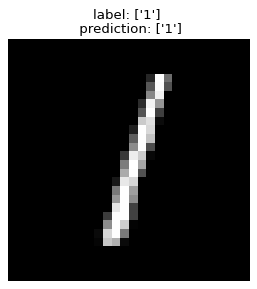

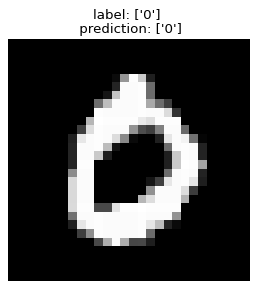

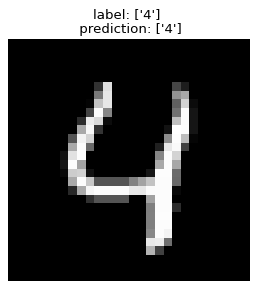

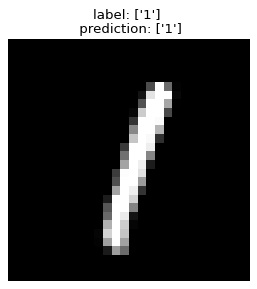

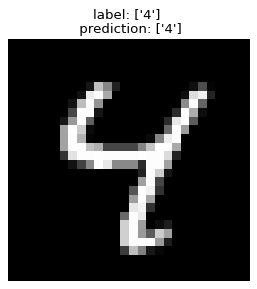

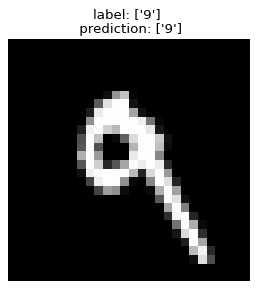

In [12]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
  y_hat = y_hat.argmax(dim=1)
  for n in range(8):
    plt.figure(dpi=80)
    plt.imshow(X[n].cpu().squeeze(),cmap='gray')
    plt.title('label: %s \n prediction: %s'%(get_mnist_labels([y[n]]),get_mnist_labels([y_hat[n]])))
    plt.axis('off')
    plt.show()
  break

# 직접 만든 데이터에 테스트해보기

In [13]:
import glob
import os
from PIL import Image
import pandas as pd

In [14]:
flist = sorted(glob.glob(os.path.join(path0,'hufs_mnist/hufs_mnist_inv/*.png')))
flist[:4]

['/content/drive/MyDrive/data/mnist/hufs_mnist/hufs_mnist_inv/l_001_00.png',
 '/content/drive/MyDrive/data/mnist/hufs_mnist/hufs_mnist_inv/l_001_01.png',
 '/content/drive/MyDrive/data/mnist/hufs_mnist/hufs_mnist_inv/l_001_02.png',
 '/content/drive/MyDrive/data/mnist/hufs_mnist/hufs_mnist_inv/l_001_03.png']

/content/drive/MyDrive/data/mnist/hufs_mnist/hufs_mnist_inv/l_006_09.png


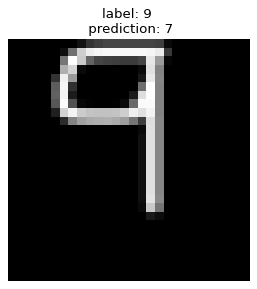

In [15]:
n=39
print(flist[n])
I = Image.open(flist[n])
I = I.resize((28,28))
I = (I - np.min(I))/(np.max(I)-np.min(I))
X = torch.zeros((1,1,28,28))
X[0,0] = torch.tensor(I)
y_hat=net(X.to(device))
#print(y_hat)
y_hat = y_hat.argmax(dim=1)
label = int(flist[n].split('.png')[0].split('_')[-1])
prediction = int(get_mnist_labels([y_hat])[0])
plt.figure(dpi=80)
plt.imshow(X[0,0].cpu().squeeze(),cmap='gray')
plt.title('label: %s \n prediction: %s'%(label,prediction))
plt.axis('off')
plt.show()

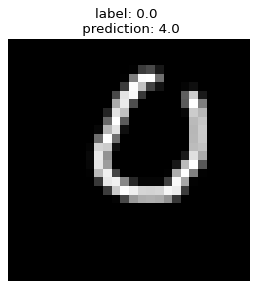

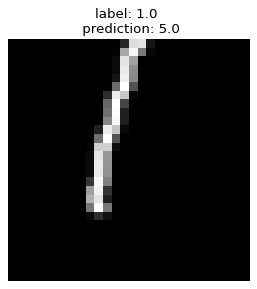

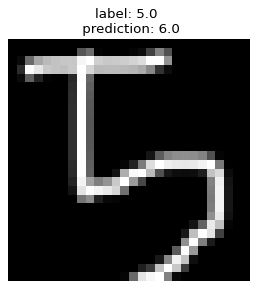

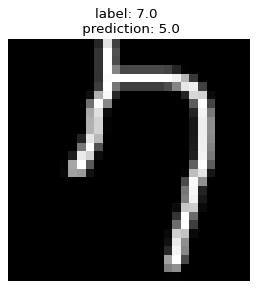

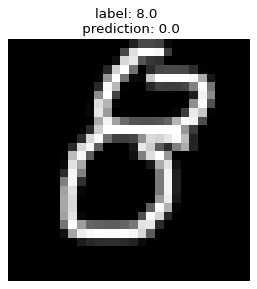

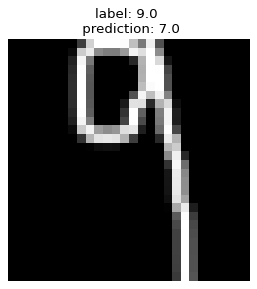

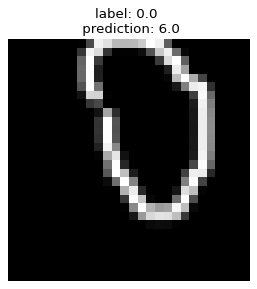

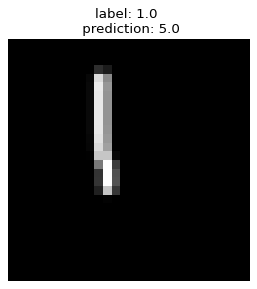

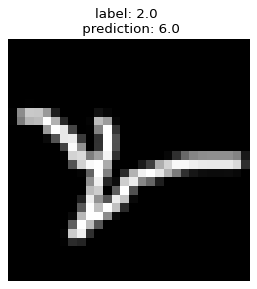

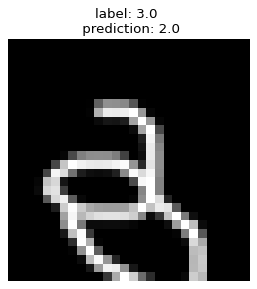

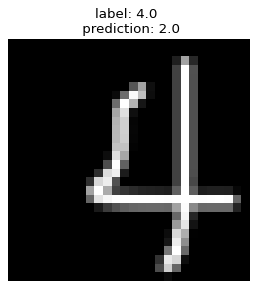

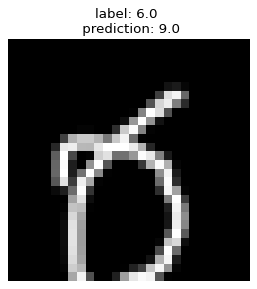

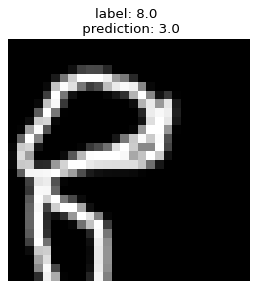

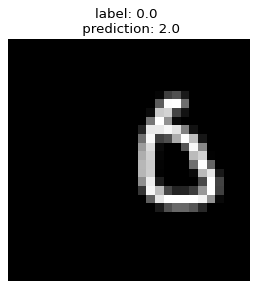

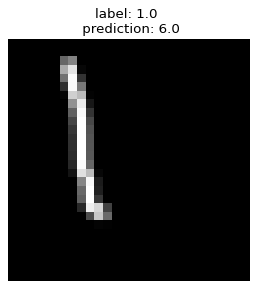

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


test accuracy = 41.05263157894737%


In [22]:
cnt=0
N_correct = 0
N_incorrect = 0
results = np.zeros((2,len(flist)))

for fn in flist:
    I = Image.open(fn)
    I = I.resize((28,28))
    I = (I - np.min(I))/(np.max(I)-np.min(I))
    X = torch.zeros((1,1,28,28))
    X[0,0] = torch.tensor(I)
    y_hat=net(X.to(device))
  #print(y_hat)
    y_hat = y_hat.argmax(dim=1)
    results[0,cnt] = int(fn.split('.png')[0].split('_')[-1])
    results[1,cnt] = int(get_mnist_labels([y_hat])[0])

    if not(results[0,cnt]==results[1,cnt]):
        N_incorrect = N_incorrect + 1
        if N_incorrect<16:
            plt.figure(dpi=80)
            plt.imshow(X[0,0].cpu().squeeze(),cmap='gray')
            plt.title('label: %s \n prediction: %s'%(results[0,cnt],results[1,cnt]))
            plt.axis('off')
            plt.show()
    else:
        N_correct = N_correct + 1

    cnt=cnt+1

print(f'test accuracy = {100*(N_correct)/len(flist)}%',)

In [17]:
T = pd.DataFrame({'filename':flist,'label':results[0,:],'prediction':results[1,:]})
T.to_csv(os.path.join(path0,'test_restuls.csv'))

In [18]:

import seaborn as sns
from sklearn.metrics import confusion_matrix


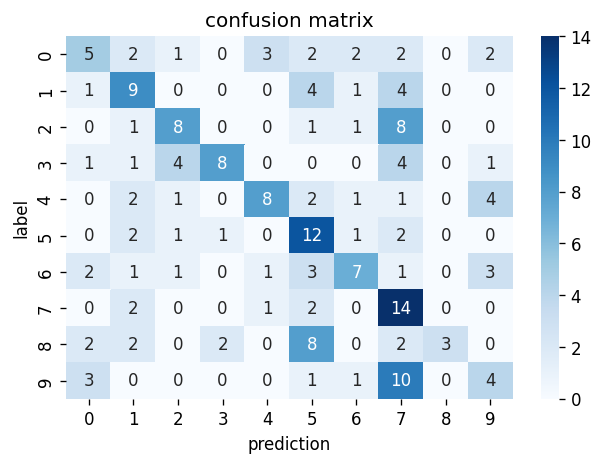

In [21]:
cf = confusion_matrix(results[0,:],results[1,:])
plt.figure(dpi=120)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.title('confusion matrix')
plt.ylabel('label')
plt.xlabel('prediction')
plt.show()